In [1]:
import pandas as pd

In [2]:
# path = "hwz data/9 CLEANED.xlsx"
# new_path = "hwz data/new 9 CLEANED.xlsx"

path = "hwz data/14 CLEANED.xlsx"
new_path = "hwz data/new 14 CLEANED.xlsx"


In [3]:
df = pd.read_excel(path)
df.head()

,Title,tborder,post_message,tborder1,Posts,byline,quote,Field1,Field2
0,Gatsbyx,"08-11-2018, 08:05 PM",I called up Lai en today and told them i want ...,6676,23,NaN,NaN,NaN,I called up Lai en today and told them i want ...
1,arcfire,"08-11-2018, 08:24 PM",\nHave you been quoted otherwise before? Why d...,6677,"2,683",Gatsbyx wrote:,I called up Lai en today and told them i want ...,Gatsbyx wrote:\n\t\n\t\n\t\n\t\tI called up La...,Gatsbyx wrote:\n\t\n\t\n\t\n\t\tI called up La...
2,Gatsbyx,"08-11-2018, 08:34 PM",I have a friend who had his full suit tailored...,6678,23,arcfire wrote:,Have you been quoted otherwise before? Why do ...,arcfire wrote:\n\t\n\t\n\t\n\t\tHave you been ...,arcfire wrote:\n\t\n\t\n\t\n\t\tHave you been ...
3,darthsid11111,"08-11-2018, 09:15 PM",Lol.\n,6679,NaN,Gatsbyx wrote:,I called up Lai en today and told them i want ...,Gatsbyx wrote:\n\t\n\t\n\t\n\t\tI called up La...,Gatsbyx wrote:\n\t\n\t\n\t\n\t\tI called up La...
4,arcfire,"08-11-2018, 10:25 PM",Do you know what fabric was used? And when was...,6680,"2,683",Gatsbyx wrote:,I have a friend who had his full suit tailored...,Gatsbyx wrote:\n\t\n\t\n\t\n\t\tI have a frien...,Gatsbyx wrote:\n\t\n\t\n\t\n\t\tI have a frien...


In [4]:
df['post_message'][0]

"I called up Lai en today and told them i want a suit made without the pants & the lady over the phone quoted me $320. Is this normal? Anyone has any experience or idea with why they're charging so high?"

In [5]:
df['post_message'][30]

'Yeah, that’s why can’t find any online cept merinobrothers. Looking at one of their linen blend series which is very nice in terms of texture, breathability and hand feel imo. Any suggestion for alternative?'

In [6]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from autocorrect import spell

In [7]:
stop = stopwords.words('english')


In [8]:
#Text Lemmatization
#As we are using wordnet Lemmatizer and the the standard NLTK pos tags are treebank tags, we need to convert the treebank tag
#to wordnet tags. 
from nltk.stem import WordNetLemmatizer
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''
    
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatization(sentence):
    words = nltk.word_tokenize(sentence)
    tagged_words = nltk.pos_tag(words)
    lemmatized_wordlist=[]
    for w in tagged_words:
        wordnettag=get_wordnet_pos(w[1])
        if wordnettag == '':
            lemmatizedword = wordnet_lemmatizer.lemmatize(w[0].lower())
        else:
            lemmatizedword = wordnet_lemmatizer.lemmatize(w[0].lower(),pos=wordnettag)
        if w[0].istitle():
            lemmatizedword = lemmatizedword.capitalize()
        elif w[0].upper()==w[0]:
            lemmatizedword = lemmatizedword.upper()
        else:
            lemmatizedword = lemmatizedword
        lemmatized_wordlist.append(lemmatizedword)
            
    return lemmatized_wordlist


In [9]:
# remove_list = ['u0001f60a', 
#                'u0001f602', 
#                'u0001f609',
#                'u0001f62c',
#                'u0001f926',
#                'u0001f60',
#                'u0001f605',
#                '\x92',
#                'x92',
#                'u0001f60a', 
#                'u201d',
#                'u2019', 
#                'u2018',
#                'u2014',
#                '\u2019',
#                '\u201d',
#                '\u2018',
#                '\u2014',
#                'sent from samsung sm-n960f using gagt',
#                'gagt',
#                "n't",
#                "'d",
#                "\\",
               
#                ]

remove_list = ['sent from samsung sm-n960f using gagt',
               'gagt',
               'click to view original image',
               'this image has been resized',
               '\n',
               '\n-',
               '%', '-', ':', '~', 
               '&', '@', '#', '$', '^',
               '*', '(', ')', '[', ']', '|',
               '<', '>', '/', '`', ';',
               "\\"
                
               ]


In [10]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [11]:
def preprocess(x):
    #lower case
    x = str(x).lower()
    
    #remove useless noise
    for lol in remove_list:
        x = x.replace(lol, '')
        
    #expand contractions
    for conc in CONTRACTION_MAP:
        x = x.replace(conc, CONTRACTION_MAP[conc])
        
    words = nltk.word_tokenize(x)

#     #remove punctuation
#     tokenizer = RegexpTokenizer(r'\w+')
#     tokens = tokenizer.tokenize(x)
#     tokens = words[3:]
    
    #remove stopwords
    filtered_words = [w for w in words if  w not in stop]
    text = " ".join(filtered_words)
    
#     #autocorrect spelling error
#     spells = [spell(w) for w in (nltk.word_tokenize(text))]
#     text = " ".join(spells)
    
    #lemmatization
    text = lemmatization(text)
#     print(text)
    text = " ".join(text)
    
    
    #remove digits
    output = ''.join(c for c in text if not c.isdigit())
    
    
    return output


In [12]:
df['post_message'][0]

"I called up Lai en today and told them i want a suit made without the pants & the lady over the phone quoted me $320. Is this normal? Anyone has any experience or idea with why they're charging so high?"

In [13]:
preprocess(df['post_message'][0])


'call lai en today tell want suit make without pant lady phone quote . normal ? anyone experience idea charge high ?'

In [14]:
df['clean_post_message'] = df['post_message'].apply(preprocess)

In [15]:
df.head()

,Title,tborder,post_message,tborder1,Posts,byline,quote,Field1,Field2,clean_post_message
0,Gatsbyx,"08-11-2018, 08:05 PM",I called up Lai en today and told them i want ...,6676,23,NaN,NaN,NaN,I called up Lai en today and told them i want ...,call lai en today tell want suit make without ...
1,arcfire,"08-11-2018, 08:24 PM",\nHave you been quoted otherwise before? Why d...,6677,"2,683",Gatsbyx wrote:,I called up Lai en today and told them i want ...,Gatsbyx wrote:\n\t\n\t\n\t\n\t\tI called up La...,Gatsbyx wrote:\n\t\n\t\n\t\n\t\tI called up La...,quote otherwise ? feel high ?
2,Gatsbyx,"08-11-2018, 08:34 PM",I have a friend who had his full suit tailored...,6678,23,arcfire wrote:,Have you been quoted otherwise before? Why do ...,arcfire wrote:\n\t\n\t\n\t\n\t\tHave you been ...,arcfire wrote:\n\t\n\t\n\t\n\t\tHave you been ...,friend full suit tailor pretty stun heard
3,darthsid11111,"08-11-2018, 09:15 PM",Lol.\n,6679,NaN,Gatsbyx wrote:,I called up Lai en today and told them i want ...,Gatsbyx wrote:\n\t\n\t\n\t\n\t\tI called up La...,Gatsbyx wrote:\n\t\n\t\n\t\n\t\tI called up La...,lol .
4,arcfire,"08-11-2018, 10:25 PM",Do you know what fabric was used? And when was...,6680,"2,683",Gatsbyx wrote:,I have a friend who had his full suit tailored...,Gatsbyx wrote:\n\t\n\t\n\t\n\t\tI have a frien...,Gatsbyx wrote:\n\t\n\t\n\t\n\t\tI have a frien...,know fabric use ? suit make ?


In [16]:

df.to_excel(new_path, index=False)

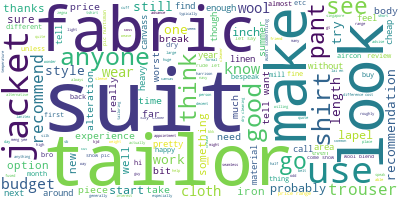

In [17]:
# Import the wordcloud library
from wordcloud import WordCloud

# useless_list = ['will', 'tailor', 'using', 'one', 'Sent', 
#                 'Samsung', 'even', 'really', 'say', 'know',
#                 'make', 'write', 'back', 'go', 'good', 'think', 'look']

# Join the different processed titles together.
long_string = ' '.join(list(df['clean_post_message'].values))

# long_string_list = long_string.split()
# long_string_list = [w for w in long_string_list if w not in useless_list]
# long_string = ' '.join(long_string_list)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [18]:
for test in df['clean_post_message']:
    test = test.split()
    if 'u201d' in test:
        print(test)
        break

In [19]:
df.shape

(99, 10)